<a href="https://colab.research.google.com/github/tavaresther/MVP1-propensao-seguro-automotivo/blob/main/MVP_1_Classifica%C3%A7%C3%A3o_de_Seguro_Automotivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Importar tudo que é necessário para o projeto e fazer as configurações necessárias
import pandas as pd
from prettytable import PrettyTable
from IPython.display import display
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 20)  # Limitar para as 20 primeiras linhas
pd.set_option('display.max_columns', 20)  # Limitar para até 10 colunas
pd.set_option('display.width', 1000)  # Definir largura de exibição

# Definição do Problema

## Problema Proposto





O problema que desejo resolver é criar uma classificação que apresente se um cliente pessoa física, de uma instituição financeira, tem perfil para contratar um seguro automotivo. Para isso, pretendo analisar o perfil e o comportamento de consumo dos clientes que já possuem esse produto, com o objetivo de identificar padrões relevantes. Esses padrões serão utilizados para treinar um algoritmo de **aprendizado de máquina supervisionado, voltado para classificação**. O objetivo é capacitar o modelo a estimar a probabilidade de sucesso na oferta do seguro automotivo para clientes que ainda não o utilizam.

O seguro automotivo é uma proteção indispensável para quem possui um veículo. Ele cobre custos em casos de acidentes, roubos, furtos e até danos a terceiros, oferecendo segurança financeira e tranquilidade para o motorista. Além disso, muitas apólices incluem benefícios como assistência 24 horas e carro reserva, tornando-o ainda mais valioso no dia a dia.

A criação de um modelo de propensão permite à empresa identificar os clientes mais propensos a contratar o seguro. Essa abordagem direcionada além de ter potencial de otimizar os custos e aumentar as taxas de conversão, poderá também melhorar a experiência dos associados e facilitar o trabalho dos colaboradores na abordagem comercial, podendo garantir que a oferta seja feita de forma assertiva e alinhada às necessidades de cada cliente.

## Premissas ou Hipóteses


1.   Existe uma faixa etária mais inclinada a contratar esse produto?
2.   Existe um faixa de renda mais inclinada a contratar esse produto?
3.  Clientes que possuem esse produto na instituição financeira, gastam com carro em seus cartões (gasolina, mecânica, lavacar, estacionamento, pedágio)?
4.  Clientes que possuem esse produto na instituição financeira possiem uma movimentação maior que os que não possuem?






## Restrições ou Condições

Essa base como informado anteriormente foi disponibilizada por uma instituição financeira cooperativista, na qual sou Análista de Dados.
Os dados disponibilizados foram apenas aqueles que foram identificados como relevantes para esse projeto e com a informação relacionada ao cliente codificada.

## Dados que serão utilizados

A base disponibilizada foi pré_processada deixando apenas o que foi considerado importante e para reduzir a quantidade de dados para que fosse possível o envio por email.

Entre as etapas desse pre-processamente foi utilizada a união de três bases distintas, o qual optei for fazer antes por não se ser parte do foco desse projeto.

Segue abaixo um explicação do que temos disponivel na base:

* cpf_codificado: Foi realizada um codficação do cpf do cliente para que não seja possivel identificar de quem se tratam esses dados;
* isa: O ISA é o nome dado para o indicador de soluções por associado(o nome dado para os clientes de uma instituição cooperativista), esse indicador conta quantos produtos diferentes o cliente possui, onde quanto mais possuir, melhor;
* mc_total: O MC é o nome dado para a Margem de Contribuição, ou seja a receita ou despesa que aquele cliente tras para a empresa;
* score_principalidade: A Principalidade é um indicador cálculado pela instituição que valida o quanto da vida financeira do cliente ocorre nessa instituição;
* prod_seguro_automovel: É um dos produtos que compõem o ISA, mas esse é ligado diretamente ao seguro automotivo, importante destacar que não importa o valor do seguro, apenas se o cliente o possui;
* renda_mensal: Renda do cliente cadastrada na instiuição;
* idade: Quantos ano esse cliente possui;
* tipo_gasto: Essa informação vem de uma base de utilização de cartão, tanto crédito quanto débito, foram filtradas apenas as relacionadas a gastos com carro: Gasolina, Manutenção, Estacionamento e Lavacar;
* gasto_3_meses: Essa informação também vem de uma base de utilização de cartão e é complementar a coluna tipo_gasto, pois nessa é informada quantas vezes o cliente teve aquele gasto nos últimos 3 meses;
* credito_automovel: Apenas sinaliza se o cliente possui ou não um crédito automotivo nessa instituição.
* possui_bem: Informa se no cadastro do cliente possui a informação se ele possui veículo;






# Preparação dos Dados

## Carga

In [2]:

#Carregar base do repositorio do Git e transformar em dataframe
url = "https://raw.githubusercontent.com/tavaresther/MVP1-propensao-seguro-automotivo/refs/heads/main/base_clientes.csv"

df_base_clientes = pd.read_csv(url)

Primeiramente vamos transformar esse df em tabela para conseguir trabalha-la e fazer um print das primeiras linhas para entender como essa base é:

In [3]:
# Vizualizar base
print(df_base_clientes.head(20))

                                       cpf_codificado  isa  mc_total  score_principalidade  prod_seguro_automovel  renda_mensal  idade                             tipo_gasto  gasto_3_meses credito_automovel possui_bem
0   511f3868982a8855cf79c58b8334ad461a32b68f5dded7...  4.0    417.62              0.370657                    0.0       4250.00   28.0                      POSTO DE GASOLINA            1.0               NaN        NaN
1   25cef0b0e3cde26e48f300ceff3fc629c41babcc673842...  3.0  -1602.17              0.273710                    0.0       6000.00   63.0                                    NaN            NaN               NaN        NaN
2   18d4733b6c9a09c27103ea6a547a67eb6f279404b61bd9...  4.0    151.25              0.158253                    0.0       8974.85   43.0                                    NaN            NaN               NaN        NaN
3   d5255b75303e65d21b40112ade9e0b2e648cd7b09bf89e...  4.0    171.61              0.186755                    0.0       6000.00 

## Transformação do tipo_gasto

A base está com clientes duplicados, por esse motivo vou iniciar minha preparação deixando apenas um vez o cliente, para isso preciso começar criando uma avaliando tudo o que tem na coluna 'tipo_gasto':

In [4]:
#Verificar quantos valores unicos tem na coluna tipo_gasto
valores_gastos = df_base_clientes['tipo_gasto'].unique()
print("Valores únicos na coluna 'tipo_gasto':")
print(valores_gastos)

Valores únicos na coluna 'tipo_gasto':
['POSTO DE GASOLINA' nan 'AUTOMOTIVE SERVICE SHOPS (NON-DEALER)'
 'CAR WASHES' 'PARKING LOTS AND GARAGES' 'MOTORCYCLE SHOPS AND DEALERS'
 'AUTO PARTS AND ACCESSORIES STORES'
 'MOTOR VEHICLE SUPPLIES AND NEW PARTS'
 'MISCELLANEOUS AUTOMOTIVE, AIRCRAFT, AND FARM EQUIPMENT DEALERS - NOT ELSEWHERE CLASSIFIED'
 'AUTOMOTIVE TIRE STORES'
 'CAR AND TRUCK DEALERS (NEW AND USED) - SALES, SERVICE, REPAIRS, PARTS, AND LEASING'
 'CAR AND TRUCK DEALERS (USED ONLY) - SALES, SERVICE, REPAIRS, PARTS, AND LEASING'
 'BOAT DEALERS' 'CAMPER, RECREATIONAL, AND UTILITY TRAILER DEALERS']


Perceba que temos algumas opção que não nos interessam:
* 'MOTORCYCLE SHOPS AND DEALERS' -  Pois nosso foco não é moto;
* 'MISCELLANEOUS AUTOMOTIVE, AIRCRAFT, AND FARM EQUIPMENT DEALERS - NOT ELSEWHERE CLASSIFIED' - Pois pode conter gastos não relacionados a carros;
* "BOAT DEALERS" - Pois nosso foco não é barcos;
* CAMPER, RECREATIONAL, AND UTILITY TRAILER DEALERS - Não é um gasto muito comum e que traga grande diferença;

Agora vamos criar uma coluna para receber 'gasto_3_meses' para cada tipo de gasto da coluna 'tipo_gasto':

In [5]:
#Criar colunas de tipos de gastos
df_base_clientes['gasto_posto_gasolina'] = np\
  .where(df_base_clientes['tipo_gasto'].str.contains('POSTO DE GASOLINA'),df_base_clientes['gasto_3_meses'],0)

df_base_clientes['gasto_mecanica_pecas'] = np\
  .where(
        (df_base_clientes['tipo_gasto'].str.contains('AUTOMOTIVE SERVICE SHOPS (NON-DEALER)')) |
        (df_base_clientes['tipo_gasto'].str.contains('AUTO PARTS AND ACCESSORIES STORES')) |
        (df_base_clientes['tipo_gasto'].str.contains('MOTOR VEHICLE SUPPLIES AND NEW PARTS')) |
        (df_base_clientes['tipo_gasto'].str.contains('AUTOMOTIVE TIRE STORES')),df_base_clientes['gasto_3_meses'],0)

df_base_clientes['gasto_lava_car'] = np\
  .where(df_base_clientes['tipo_gasto'].str.contains('CAR WASHES'),df_base_clientes['gasto_3_meses'],0)

df_base_clientes['gasto_estacionamento'] = np\
  .where(df_base_clientes['tipo_gasto'].str.contains('PARKING LOTS AND GARAGES'),df_base_clientes['gasto_3_meses'],0)

df_base_clientes['gasto_concessionaria'] = np\
  .where(
        (df_base_clientes['tipo_gasto'].str.contains('CAR AND TRUCK DEALERS (NEW AND USED) - SALES, SERVICE, REPAIRS, PARTS, AND LEASING')) |
        (df_base_clientes['tipo_gasto'].str.contains('CAR AND TRUCK DEALERS (USED ONLY) - SALES, SERVICE, REPAIRS, PARTS, AND LEASING')),df_base_clientes['gasto_3_meses'],0)


<ipython-input-5-d1e2696971e8>:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df_base_clientes['tipo_gasto'].str.contains('AUTOMOTIVE SERVICE SHOPS (NON-DEALER)')) |
<ipython-input-5-d1e2696971e8>:20: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df_base_clientes['tipo_gasto'].str.contains('CAR AND TRUCK DEALERS (NEW AND USED) - SALES, SERVICE, REPAIRS, PARTS, AND LEASING')) |
<ipython-input-5-d1e2696971e8>:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df_base_clientes['tipo_gasto'].str.contains('CAR AND TRUCK DEALERS (USED ONLY) - SALES, SERVICE, REPAIRS, PARTS, AND LEASING')),df_base_clientes['gasto_3_meses'],0)


In [6]:
# Vizualizar base
print(df_base_clientes.head(20))

                                       cpf_codificado  isa  mc_total  score_principalidade  prod_seguro_automovel  renda_mensal  idade                             tipo_gasto  gasto_3_meses credito_automovel possui_bem  gasto_posto_gasolina  gasto_mecanica_pecas  gasto_lava_car  gasto_estacionamento  gasto_concessionaria
0   511f3868982a8855cf79c58b8334ad461a32b68f5dded7...  4.0    417.62              0.370657                    0.0       4250.00   28.0                      POSTO DE GASOLINA            1.0               NaN        NaN                   1.0                   0.0             0.0                   0.0                   0.0
1   25cef0b0e3cde26e48f300ceff3fc629c41babcc673842...  3.0  -1602.17              0.273710                    0.0       6000.00   63.0                                    NaN            NaN               NaN        NaN                   NaN                   0.0             NaN                   NaN                   0.0
2   18d4733b6c9a09c27103ea6a547a67

## Tranformação do credito_automovel

Agora vou verificar o que temos na coluna 'credito_automovel':

In [7]:
#Verificar quantos valores unicos tem na coluna credito_automovel
valores_credito = df_base_clientes['credito_automovel'].unique()
print("Valores únicos na coluna 'credito_automovel':")
print(valores_credito)

Valores únicos na coluna 'credito_automovel':
[nan 'VEICULOS E UTILITARIOS LEVES - REVENDAS                   '
 'FISITAL - FINANC. VEICULOS                                '
 'VEÍCULOS DE PASSEIO                                       '
 'CREDITO PRE-APROVADO VEICULOS LEVES UA                    '
 'VEICULOS PESADOS - REVENDAS                               '
 'VEÍCULOS UTILITÁRIOS LEVES                                '
 'VEÍCULOS PESADOS                                          '
 'VEICULOS E UTI. LEVES - REVENDAS - NOVO ASSOCIADO         '
 'PORTABILIDADE CRÉDITO VEÍCULOS                            ']


Podemos observar que temos muitos valores o que não é nosso interesse, então vamos criar uma coluna chamada 'possui_credito_auto' e popular com 1 caso a coluna 'credito_automovel' não for nula:

In [8]:
#Criar uma coluna que valida se o cliente possui credito automovel coloca 1 e 0 se não possuir
df_base_clientes['possui_credito_auto'] = np.where(df_base_clientes['credito_automovel'].notna(), 1, 0)

## Transformação do possui bem

Agora vou verificar o que temos na coluna 'possui_bem':

In [9]:
#Verificar quantos valores unicos tem na coluna possui_bem
valores_bens = df_base_clientes['possui_bem'].unique()
print("Valores únicos na coluna 'possui_bem':")
print(valores_bens)

Valores únicos na coluna 'possui_bem':
[nan 'VEÍCULOS'
 'AUTOMOVEL HYUNDAI CRETA 1.6 AT - PULSE PLUS. ANO/MOD: 2017/2018. COR: BRANCO POLAR SOLIDO - ADQUIRIDA DE HOUSE PARTS COMERCIO DE PECAS E VEICULOS LTDA - CNPJ: 11.472.103/0003-32 - EM OUTUBRO DE 2017 - CFE DANFE 19583 - TENDO DADO DE ENTRADA O VALOR RECEBIDO DO CREDITO QUE MANTEM COM A EMPRESA BRUM &\nFRIEDHEIN LTDA - DECORRENTE DE EMPRESTIMO EFETUADO - ENTRADA NO VALOR DE R$ 55.000,00 E SALDO PARCELADO EM 36 VEZES DE R$ 1.071,29 - PGTO EM 2017 VALOR TOTAL R$ 2.142,58 - PGTO EM 2018 VALOR TOTAL R$ 12.855,48, CFE IR'
 ... 'VEICULO JETTA ANO 2013/2014 PLACA MLL 097'
 'VEÍCULO CHEVROLET PRISMA, ANO 2014/2015 DE COR PRATA'
 'VEICULO GM/CORSA CLASSIC ANO 2008/2008 - ADQUIRIDO EM\nDEZEMBRO DE 2011 COM ALIENACAO FIDUCIARIA.\nRENAVAM: 00967095700\n']


Podemos observar que temos muitos valores o que não é nosso interesse, então vamos criar uma coluna chamada 'possui_carro' e popular com 1 caso a coluna 'possui_bem' não for nula:

In [10]:
#Criar uma coluna que valida se o cliente possui bem coloca 1 e 0 se não possuir
df_base_clientes['possui_carro'] = np.where(df_base_clientes['possui_bem'].notna(), 1, 0)

In [11]:
# Vizualizar base
print(df_base_clientes.head(20))

                                       cpf_codificado  isa  mc_total  score_principalidade  prod_seguro_automovel  renda_mensal  idade                             tipo_gasto  gasto_3_meses credito_automovel possui_bem  gasto_posto_gasolina  gasto_mecanica_pecas  gasto_lava_car  gasto_estacionamento  gasto_concessionaria  possui_credito_auto  possui_carro
0   511f3868982a8855cf79c58b8334ad461a32b68f5dded7...  4.0    417.62              0.370657                    0.0       4250.00   28.0                      POSTO DE GASOLINA            1.0               NaN        NaN                   1.0                   0.0             0.0                   0.0                   0.0                    0             0
1   25cef0b0e3cde26e48f300ceff3fc629c41babcc673842...  3.0  -1602.17              0.273710                    0.0       6000.00   63.0                                    NaN            NaN               NaN        NaN                   NaN                   0.0             NaN         

## Finalizar base que será usada

Antes de Finalizar a base preciso verificar se temos nullos, pois isso pode atrapalhar na proxima etapa que tenho:

In [12]:
# Conta os valores nulos por coluna
nulos_por_coluna = df_base_clientes.isnull().sum()

print(nulos_por_coluna)

cpf_codificado               0
isa                          0
mc_total                     0
score_principalidade      6148
prod_seguro_automovel        0
renda_mensal              1060
idade                       62
tipo_gasto               37790
gasto_3_meses            37790
credito_automovel        89048
possui_bem               68629
gasto_posto_gasolina     37790
gasto_mecanica_pecas         0
gasto_lava_car           37790
gasto_estacionamento     37790
gasto_concessionaria         0
possui_credito_auto          0
possui_carro                 0
dtype: int64


Como tenho conhecimento sobre como esse dataset funciona eu sei que:
* Na coluna score_principalidade os clientes que estão nulos não possuem movimentação o suficuente para cálcular, isso acontece pois provavelmente abriram a conta a menos de 3 meses,  por esse motivo, se tratando de um cliente novo as previsões são um pouco mais complicadas pois não tem tanto histórico de movimentação, então vou retirar esses clientes;

* Na coluna renda_mensal os casos nulos são por que não foi cadastrado, esse casos considerarei como 0;

* Na coluna idade, muito provavelmente se trata de um erro de classificação do tipo de pessoa, não deve ser um cliente pessoa fisica pois toda pessoa fisica possui data de nascimento e concequentemente idade, por esse motivo vou filtrar o dataset tirando esses clientes;

* Na coluna tipo_gasto e gasto_3_meses o null significa que esse cliente não possui esse tipo de gasto, porém essas colunas foram base para criar as seguintes: gasto_posto_gasolina, gasto_mecanica_pecas, gasto_lava_car,
gasto_estacionamento e gasto_concessionaria. Farei a alteração de null para zero apenas nas criadas que precisarem;

* Na coluna credito_automovel o null significa que esse cliente não possui esse tipo de crédito, porém essa coluna foi utilizada para criar a possui_credito_auto, a qual não tem null, então deixarei essa como esta;

* Na coluna possui_bem o null significa que esse cliente não possui esse tipo de bem, porém essa coluna foi utilizada para criar a possui_carro, a qual não tem null, então deixarei essa como esta;


In [13]:
# Remove as linhas onde 'idade' é nulo
df_base_clientes = df_base_clientes.dropna(subset=['idade'])

# Remove as linhas onde 'score_principalidade' é nulo
df_base_clientes = df_base_clientes.dropna(subset=['score_principalidade'])

#Substuir null nas colunas necessárias
df_base_clientes['renda_mensal'] = df_base_clientes['renda_mensal'].fillna(0)
df_base_clientes['gasto_posto_gasolina'] = df_base_clientes['gasto_posto_gasolina'].fillna(0)
df_base_clientes['gasto_lava_car'] = df_base_clientes['gasto_lava_car'].fillna(0)
df_base_clientes['gasto_estacionamento'] = df_base_clientes['gasto_estacionamento'].fillna(0)

Agora conseguimos deixar apenas uma vez o associado, fazendo uma agregação e selecionando apenas as colunas que precisamos. Mas antes preciso saber se as colunas que vou usar são valor, para conseguir trabalhar:

In [14]:
print(df_base_clientes.dtypes)

cpf_codificado            object
isa                      float64
mc_total                 float64
score_principalidade     float64
prod_seguro_automovel    float64
renda_mensal             float64
idade                    float64
tipo_gasto                object
gasto_3_meses            float64
credito_automovel         object
possui_bem                object
gasto_posto_gasolina     float64
gasto_mecanica_pecas     float64
gasto_lava_car           float64
gasto_estacionamento     float64
gasto_concessionaria     float64
possui_credito_auto        int64
possui_carro               int64
dtype: object


Das colunas que vamos usar, apena mc_total, score_principalidade e renda_mensal precisam ser float, as demais vou tranformar em int:

In [15]:
#Tranformar as colunas em inteiro
df_base_clientes['isa'] = df_base_clientes['isa'].astype(int)
df_base_clientes['prod_seguro_automovel'] = df_base_clientes['prod_seguro_automovel'].astype(int)
df_base_clientes['idade'] = df_base_clientes['idade'].astype(int)
df_base_clientes['gasto_posto_gasolina'] = df_base_clientes['gasto_posto_gasolina'].astype(int)
df_base_clientes['gasto_mecanica_pecas'] = df_base_clientes['gasto_mecanica_pecas'].astype(int)
df_base_clientes['gasto_lava_car'] = df_base_clientes['gasto_lava_car'].astype(int)
df_base_clientes['gasto_estacionamento'] = df_base_clientes['gasto_estacionamento'].astype(int)
df_base_clientes['gasto_concessionaria'] = df_base_clientes['gasto_concessionaria'].astype(int)

Note que usarei a média em praticamente todas colunas, apenas nas colunas criadas de tipos de gastos trabalharei uma soma, optei por trabalhar assim pois ao avaliar a base veriquei que o mesmo associado sempre apresenta o mesmo valor em todas as colunas menos nas colunas 'tipo_gasto' e 'gasto_3_meses, e nas novas colunas que criei de gastos algumas pegam mais de um tipo, então precisa somar para saber quantas vezes teve gasto daquale:

In [16]:
#Agregar base pelo cpf_codificado
df_base_clientes = df_base_clientes.groupby('cpf_codificado').agg({
    'isa': 'mean',
    'mc_total': 'mean',
    'score_principalidade': 'mean',
    'prod_seguro_automovel': 'mean',
    'renda_mensal': 'mean',
    'idade': 'mean',
    'possui_credito_auto': 'mean',
    'gasto_posto_gasolina': 'sum',
    'gasto_mecanica_pecas': 'sum',
    'gasto_lava_car': 'sum',
    'gasto_estacionamento': 'sum',
    'gasto_concessionaria': 'sum',
    'possui_carro': 'mean'
}).reset_index()

In [17]:
# Vizualizar base
print(df_base_clientes.head(20))

                                       cpf_codificado   isa  mc_total  score_principalidade  prod_seguro_automovel  renda_mensal  idade  possui_credito_auto  gasto_posto_gasolina  gasto_mecanica_pecas  gasto_lava_car  gasto_estacionamento  gasto_concessionaria  possui_carro
0   00018c293348e882f3fcf011de4aa6041cec460dcd6413...   0.0     -0.34              0.044667                    0.0       2003.89   39.0                  0.0                     0                     0               0                     0                     0           0.0
1   000190fb6d45f7b2401d25432c34db940d44ec07a864bd...  11.0    236.47              0.950598                    0.0          0.00   24.0                  0.0                     3                     3               0                     2                     0           0.0
2   00026206f25f6b402cb0ad4a6c85a052bb51308a60a58c...   7.0     61.58              0.811080                    0.0      10000.00   34.0                  0.0                   

#Validar Premissas e Hipóteses

Com a base pronta, vamos entender melhor esses dados, fazer um cálculo de média para entender como cada intem se comporta para clientes que possuem ou não seguro auto

In [18]:
#Agregar base pelo cpf_codificado
df_base_clientes_analise = df_base_clientes.groupby('prod_seguro_automovel').agg({
    'cpf_codificado': 'count',
    'isa': 'mean',
    'mc_total': 'mean',
    'score_principalidade': 'mean',
    'renda_mensal': 'mean',
    'idade': 'mean',
    'possui_credito_auto': 'mean',
    'gasto_posto_gasolina': 'mean',
    'gasto_mecanica_pecas': 'mean',
    'gasto_lava_car': 'mean',
    'gasto_estacionamento': 'mean',
    'gasto_concessionaria': 'mean',
    'possui_carro': 'mean'
}).reset_index()

In [19]:
# Vizualizar base
print(df_base_clientes_analise.head(20))

   prod_seguro_automovel  cpf_codificado       isa    mc_total  score_principalidade  renda_mensal      idade  possui_credito_auto  gasto_posto_gasolina  gasto_mecanica_pecas  gasto_lava_car  gasto_estacionamento  gasto_concessionaria  possui_carro
0                    0.0           55155  3.996319   76.539281              0.436695   5447.483186  41.523887             0.027849              4.647774              0.395232        0.039634              0.406944                   0.0      0.155308
1                    1.0            1413  8.958245  326.801522              0.741908   7586.290410  47.811040             0.162067             11.723992              0.791224        0.092003              1.099788                   0.0      0.528662


A primeira coisa que podemos observar é que os dados estão muito desbalanceados, pouquissimos clientes possuem esse produto. Porém, podemos observar algumas coisas:

1. Existe uma faixa etária mais inclinada a contratar esse produto?
A média da idade dos clientes que possuem esse seguro é um pouco maior dos que não tem.

2. Existe um faixa de renda mais inclinada a contratar esse produto?
A média da renda dos clientes que possuem esse seguro é cerca de 2000 reais a mais.

3. Clientes que possuem esse produto na instituição financeira, gastam com carro em seus cartões (gasolina, mecânica, lavacar, estacionamento, pedágio)?
Sim, cerca de 3 vezes mais em todos os gastos relacionados.

4. Clientes que possuem esse produto na instituição financeira possuem uma movimentação maior que os que não possuem?
Sim, possuem mais produtos, mais margem de contribuição e uma principalidade maior, além disso possum um cadastro mais atualizado, uma vez que em média esses clientes possuem mais carros registrados entre seus bens.

#Prepar a base para o treinamento

Primeiramente eu vou definir na minha base qual é minha target e que opções de features eu tenho.

Minha target obviamente é a coluna prod_seguro_automovel, quero identificar que associados são propensos a contratar esse produto, e as demais coluna tirando o cpf_codificado, são minhas opções de features.

In [20]:
# Divisão em features(x) e target(y)
X = df_base_clientes.drop(columns=['cpf_codificado', 'prod_seguro_automovel'])
y = df_base_clientes['prod_seguro_automovel']

Agora vou dividir minha base em treino e teste, optei por trabalhar o padrão que vemos ao estudar que é de 70% treino e 30% teste

In [21]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

E para melhorar o desempenho dos algoritmos de aprendizagem, vou trabalhar a normalização também.

Estava entre MinMaxScaler e StandardScaler, mas optei pelo StandardScaler.

In [22]:
# Normalização dos dados
scaler = StandardScaler()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Como comentado na etapa de validar as premissas e hipóteses, minha base está bem desbalanceada, então utilizarei o smote para resolver isso, optei por utilizar o SMOTE por ter menos desvantagens que os outros que estudei, além desse cogitei a utilização dos seguintes:
* Oversampling Tradicional - pode levar ao overfitting;
* Undersampling - Pode remover dados importantes;
* Ajuste de Pesos (Class Weights) - Meus dados estão bem desbalanceados (cerca de 5% da base possui o target);

In [23]:
# Tratando o desbalanceamento com SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_norm, y_train)

#Seleção das features

Para a seleção das features, eu testarei 3 modelos diferente, como tenho conhecimento da base conseguirei validar qual considero melhor.

In [24]:
# Seleção univariada
select_kbest = SelectKBest(score_func=f_classif, k=5)
X_kbest = select_kbest.fit_transform(X_train_balanced, y_train_balanced)
kbest_features = X_train_balanced.columns[select_kbest.get_support()]

# Importância com Random Forest
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_train_balanced, y_train_balanced)
rf_importances = pd.Series(rf_selector.feature_importances_, index=X_train_balanced.columns)
rf_selected_features = rf_importances.nlargest(5).index

# Seleção com Informação Mútua
mutual_info = mutual_info_classif(X_train_balanced, y_train_balanced)
mutual_info_series = pd.Series(mutual_info, index=X_train_balanced.columns)
mutual_info_features = mutual_info_series.nlargest(5).index

print("\nSeleção de Features:")
print(f"SelectKBest: {list(kbest_features)}")
print(f"RandomForest: {list(rf_selected_features)}")
print(f"Mutual Information: {list(mutual_info_features)}")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Seleção de Features:
SelectKBest: ['isa', 'score_principalidade', 'idade', 'possui_credito_auto', 'possui_carro']
RandomForest: ['isa', 'mc_total', 'score_principalidade', 'idade', 'gasto_posto_gasolina']
Mutual Information: ['idade', 'gasto_posto_gasolina', 'isa', 'score_principalidade', 'renda_mensal']


Podemos observar que isa, idade e principalidade aparece nos três.

Avaliando o SelectKBest, possui_credito_auto e possui_carro são features que possuem uma representação baixa(conforme podemos observar na etapa de validação), então acredito que não são features boas.

Avaliando o RandomForest, gasto_posto_gasolina realmente tem uma boa representatividade nos clientes que possuem o seguro auto e o mc_total desses clientes também é consideravelmente maior com relação ao outro grupo. Essa é uma opção boa.

Com relação ao Mutual Information, nele temos de novo a renda_mensal, que também é consideravelmente maior no publico que possui o seguro auto, além é claro do gasto_posto_gasolina que ja avaliamos.

Então, minha decisão com base nesses algoritmos e conforme minha experiência com essas bases, optarei por trabalhar com as seguintes features:
isa, idade, principalidade, mc_total e renda_mensal

#Treinamento

Primeiramente, vou começar deixando apenas as features que preciso.

In [25]:
#Selecionar features e criar nova base de x_train e x_test
features_to_use = ['isa', 'idade', 'score_principalidade', 'mc_total', 'renda_mensal']
X_train = X_train_balanced[features_to_use]
X_test = X_test[features_to_use]
y_train = y_train_balanced

Agora eu vou treinar 5 algoritmos diferentes, sendo eles:

* LogisticRegression;
* RandomForestClassifier;
* GradientBoostingClassifier;
* SVC;
* KNeighborsClassifier;

Optei por utilizar os hiperparametros que geralmente são utilizados, mas em um contexto de trabalho, provavelmente treinaria com diversaos hiperparametros diferentes para chegar no que acredito ser o ideal.

In [26]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

In [27]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [28]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

In [32]:
# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_test, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

Agora vamos vizualizar os resultados que cada um dos algoritmos gerou e avaliar qual seria o mais indicado.

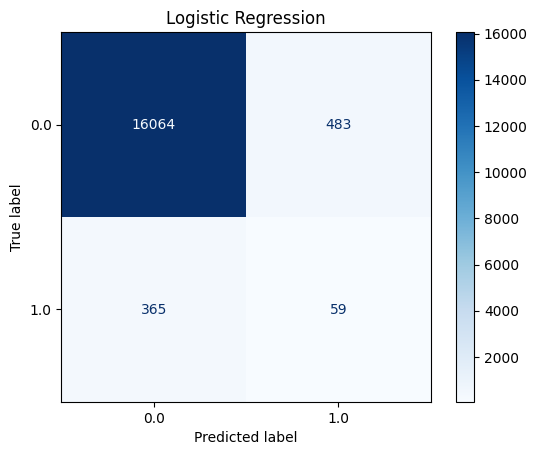

<Figure size 500x400 with 0 Axes>

Logistic Regression
Accuracy: 0.9500
Precision: 0.9561
Recall: 0.9500
F1 Score: 0.9530

--------------------------------------------------



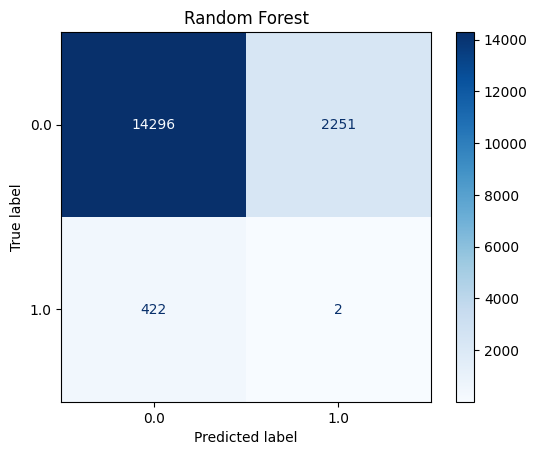

<Figure size 500x400 with 0 Axes>

Random Forest
Accuracy: 0.8425
Precision: 0.9471
Recall: 0.8425
F1 Score: 0.8917

--------------------------------------------------



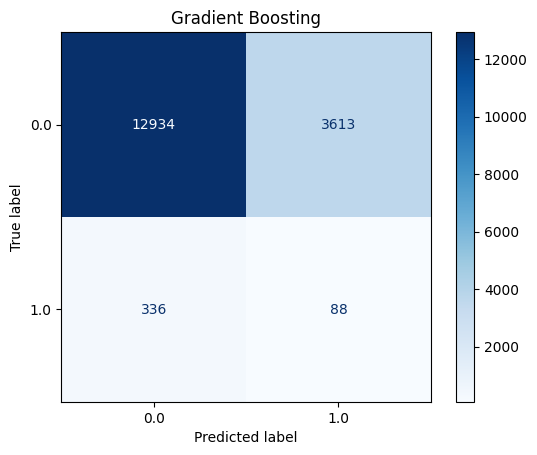

<Figure size 500x400 with 0 Axes>

Gradient Boosting
Accuracy: 0.7673
Precision: 0.9509
Recall: 0.7673
F1 Score: 0.8469

--------------------------------------------------



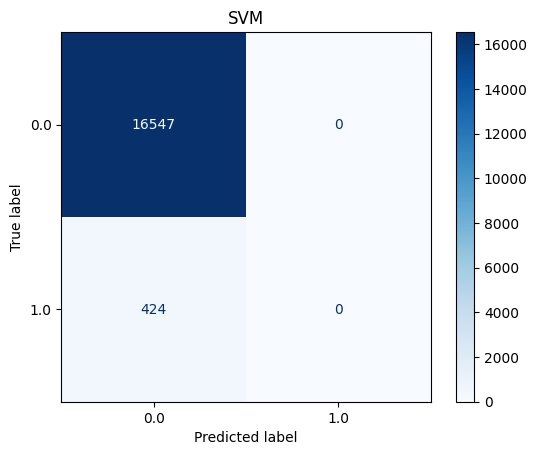

<Figure size 500x400 with 0 Axes>

SVM
Accuracy: 0.9750
Precision: 0.9507
Recall: 1.0000
F1 Score: 0.9627

--------------------------------------------------



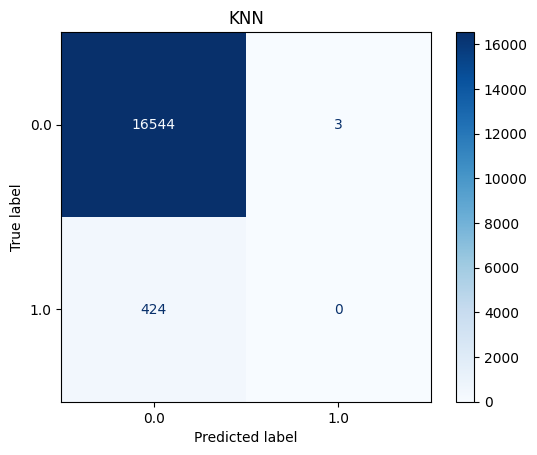

<Figure size 500x400 with 0 Axes>

KNN
Accuracy: 0.9748
Precision: 0.9507
Recall: 0.9748
F1 Score: 0.9626


In [40]:
# Logistic Regression
ConfusionMatrixDisplay(conf_matrix_lr, display_labels=lr.classes_).plot(cmap='Blues', values_format='d')
plt.title("Logistic Regression")
plt.figure(figsize=(5, 4))  # Ajuste o tamanho da matriz de confusão
plt.tight_layout()
plt.show()

print("Logistic Regression")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print("\n" + "-"*50 + "\n")

# Random Forest
ConfusionMatrixDisplay(conf_matrix_rf, display_labels=rf.classes_).plot(cmap='Blues', values_format='d')
plt.title("Random Forest")
plt.figure(figsize=(5, 4))  # Ajuste o tamanho da matriz de confusão
plt.tight_layout()
plt.show()

print("Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print("\n" + "-"*50 + "\n")

# Gradient Boosting
ConfusionMatrixDisplay(conf_matrix_gb, display_labels=gb.classes_).plot(cmap='Blues', values_format='d')
plt.title("Gradient Boosting")
plt.figure(figsize=(5, 4))  # Ajuste o tamanho da matriz de confusão
plt.tight_layout()
plt.show()

print("Gradient Boosting")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
print("\n" + "-"*50 + "\n")

# SVM
ConfusionMatrixDisplay(conf_matrix_svm, display_labels=svm.classes_).plot(cmap='Blues', values_format='d')
plt.title("SVM")
plt.figure(figsize=(5, 4))  # Ajuste o tamanho da matriz de confusão
plt.tight_layout()
plt.show()

print("SVM")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print("\n" + "-"*50 + "\n")

# KNN
ConfusionMatrixDisplay(conf_matrix_knn, display_labels=knn.classes_).plot(cmap='Blues', values_format='d')
plt.title("KNN")
plt.figure(figsize=(5, 4))  # Ajuste o tamanho da matriz de confusão
plt.tight_layout()
plt.show()

print("KNN")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")

Para finalizar, vamos avaliar o resultado de cada um dos algoritmos:
* LogisticRegression - Errou muitos dos que deveriam ser 1;
* RandomForestClassifier - Errou muitos dos que deveriam ser 1;
* GradientBoostingClassifier - Errou muitos dos que deveriam ser 1;
* SVC - Teve 100% overfitting;
* KNeighborsClassifier - Teve overfitting em praticamente toda a base;

Nenhum desses teve uma boa entrega ao olhar a matriz de precissão, a acuracia o recall e a precisão de alguns até ficou relativamente boa, mas precisaria de mais algumas adaptações para ficar melhor. Porém, se fosse selecionar uma das opções acredito que